## Hồ Trọng Danh
## MSV: 2022602033
## KHMT1

In [ ]:
# Khai báo thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
# Khai báo các tham số cần sử dụng
PATH_FILE = 'data_tx2.csv'
DPI = 300
KFOLD = 3

In [ ]:
# Câu a: đọc file dữ liệu và chuẩn hóa dữ liệu theo phương pháp min-max

# Đọc file dữ liệu
try:
    df = pd.read_csv(PATH_FILE)
    print("Đọc file thành công!")
    print(df.head(5))
except FileNotFoundError:
    print(f'Lỗi {PATH_FILE}')

Đọc file thành công!
     A     B    C    D    E     F    G Class
0  9.0  15.0  3.7  2.9  1.2   5.9  4.0     P
1  3.5   4.5  3.1  2.5  2.8  10.0  6.7     N
2  4.1   4.9  2.1  3.7  2.5  10.0  3.3     P
3  4.6   3.5  2.5  2.2  2.7  11.0  7.2     P
4  5.6   1.6  4.1  3.9  4.7   5.6  2.9     N


In [ ]:
# Chuẩn hóa thuộc tính nhãn sang dạng số
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
print(df['Class'])

0     1
1     0
2     1
3     1
4     0
5     1
6     1
7     1
8     0
9     1
10    0
11    1
Name: Class, dtype: int64


In [ ]:
# Chia dữ liệu
X = df.iloc[:, :-1] # Chứa các thuộc tính của dữ liệu
y = df.iloc[:, -1] # Chúa nhãn của dữ liệu

# Chuẩn hóa dữ liệu theo phương pháp min-max
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# In X
print(X)

[[1.         1.         0.8        0.0625     0.         0.37209302
  0.30434783]
 [0.19117647 0.21641791 0.5        0.02678571 0.4        0.84883721
  0.89130435]
 [0.27941176 0.24626866 0.         0.13392857 0.325      0.84883721
  0.15217391]
 [0.35294118 0.14179104 0.2        0.         0.375      0.96511628
  1.        ]
 [0.5        0.         1.         0.15178571 0.875      0.3372093
  0.06521739]
 [0.51470588 0.17164179 0.25       0.32142857 0.275      0.22093023
  0.2173913 ]
 [0.98529412 0.06716418 0.15       0.11607143 0.1        0.79069767
  0.04347826]
 [0.10294118 0.11940299 0.4        0.15178571 0.675      0.91860465
  0.30434783]
 [0.         0.04477612 0.9        1.         0.25       1.
  0.06521739]
 [0.60294118 0.18656716 0.15       0.88392857 0.15       0.
  0.30434783]
 [0.01470588 0.1119403  0.7        0.         1.         0.36046512
  0.08695652]
 [0.82352941 0.08208955 0.65       0.04464286 0.975      0.08139535
  0.        ]]


In [ ]:
# Câu b: Chuẩn bị dữ liệu theo phương pháp kiểm định chéo k-folds
data_fold = {
    'X_train':[], # Chứa X_train của từng fold
    'y_train' : [],
    'X_test' : [],
    'y_test' : []
}  # chứa dữ liệu của từng fold
# Khởi tạo k fold
kf = KFold(n_splits = KFOLD)
# Chia dữ liệu theo từng fold
for train_index, test_index in kf.split(X):
    data_fold['X_train'].append(X[train_index])
    data_fold['X_test'].append(X[test_index])
    data_fold['y_train'].append(y[train_index])
    data_fold['y_test'].append(y[test_index])


In [ ]:
# Câu c: Xây dựng mô hình naive-bayes
# Khoi tao dict chua cac chi so danh gia mo hinh
value_bayes = {
    'accuracy' : [],
    'recall' : [],
    'precision' : [],
    'f1-score' : [],
    'execution-time' : []
}

for i in range(KFOLD):
    # Khoi tao mo hinh naive-bayes
    clf_bayes = GaussianNB()

    start_bayes = time.time() # Bat dau tinh gio
    # Huan luyen mo hinh
    clf_bayes.fit(data_fold['X_train'][i], data_fold['y_train'][i])
    # Thoi gian huan luyen
    execution_time_bayes = time.time() - start_bayes
    # Du doan ket qua
    y_pred_bayes = clf_bayes.predict(data_fold['X_test'][i])

    # Tinh cac chi so danh gia mo hinh
    acc = accuracy_score(data_fold['y_test'][i], y_pred_bayes)
    rec = recall_score(data_fold['y_test'][i], y_pred_bayes)
    f1 = f1_score(data_fold['y_test'][i], y_pred_bayes)
    pre = precision_score(data_fold['y_test'][i], y_pred_bayes)

    # Luu ket qua
    value_bayes['accuracy'].append(acc)
    value_bayes['recall'].append(rec)
    value_bayes['precision'].append(pre)
    value_bayes['f1-score'].append(f1)
    value_bayes['execution-time'].append(execution_time_bayes)

    # In ket qua theo tung fold
    print("FOLD:", i + 1)  # In số thứ tự của fold
    # Cac chỉ số đánh giá
    print("{:<15}{:<15}{:<15}{:<15}{:<15}".format("Precision", "Recall", "F1-Score", "Accuracy", 'Execution Time'))
    # In kết quả
    print("{:<15.4}{:<15.4}{:<15.4}{:<15.4}{:<15.10}".format(
        f"{pre * 100}%", f"{rec * 100}%", f"{f1 * 100}%", f"{acc * 100}%", f"{execution_time_bayes}s"
    ))
    print('-'*75)

# Tinh trung binh cac chi so
acc_bayes = np.mean(value_bayes['accuracy'])
rec_bayes = np.mean(value_bayes['recall'])
pre_bayes = np.mean(value_bayes['precision'])
f1_bayes = np.mean(value_bayes['f1-score'])
execution_bayes = np.mean(value_bayes['execution-time'])

# Tinh do lech chuan cua cac chi so
std_acc_bayes = np.std(value_bayes['accuracy'])
std_rec_bayes = np.std(value_bayes['recall'])
std_pre_bayes = np.std(value_bayes['precision'])
std_f1_bayes = np.std(value_bayes['f1-score'])
std_execution_bayes = np.std(value_bayes['execution-time'])
# Hien thi ket qua
# print("Accuracy: {:<5.4} ± {:<5.4}".format(acc_bayes, std_acc_bayes))
# print("Recall: {:<5.4} ± {:<5.4}".format(rec_bayes, std_rec_bayes))
# print("Precision: {:<5.4} ± {:<5.4}".format(pre_bayes, std_pre_bayes))
# print("F1 Score: {:<5.4} ± {:<5.4}".format(f1_bayes, std_f1_bayes))
# print("Execution Time: {:<5.4} ± {:<5.4}".format(execution_bayes, std_execution_bayes))

FOLD: 1
Precision      Recall         F1-Score       Accuracy       Execution Time 
75.0           100.           85.7           75.0           0.00158023     
---------------------------------------------------------------------------
FOLD: 2
Precision      Recall         F1-Score       Accuracy       Execution Time 
66.6           66.6           66.6           50.0           0.00139522     
---------------------------------------------------------------------------
FOLD: 3
Precision      Recall         F1-Score       Accuracy       Execution Time 
50.0           50.0           50.0           50.0           0.00311517     
---------------------------------------------------------------------------


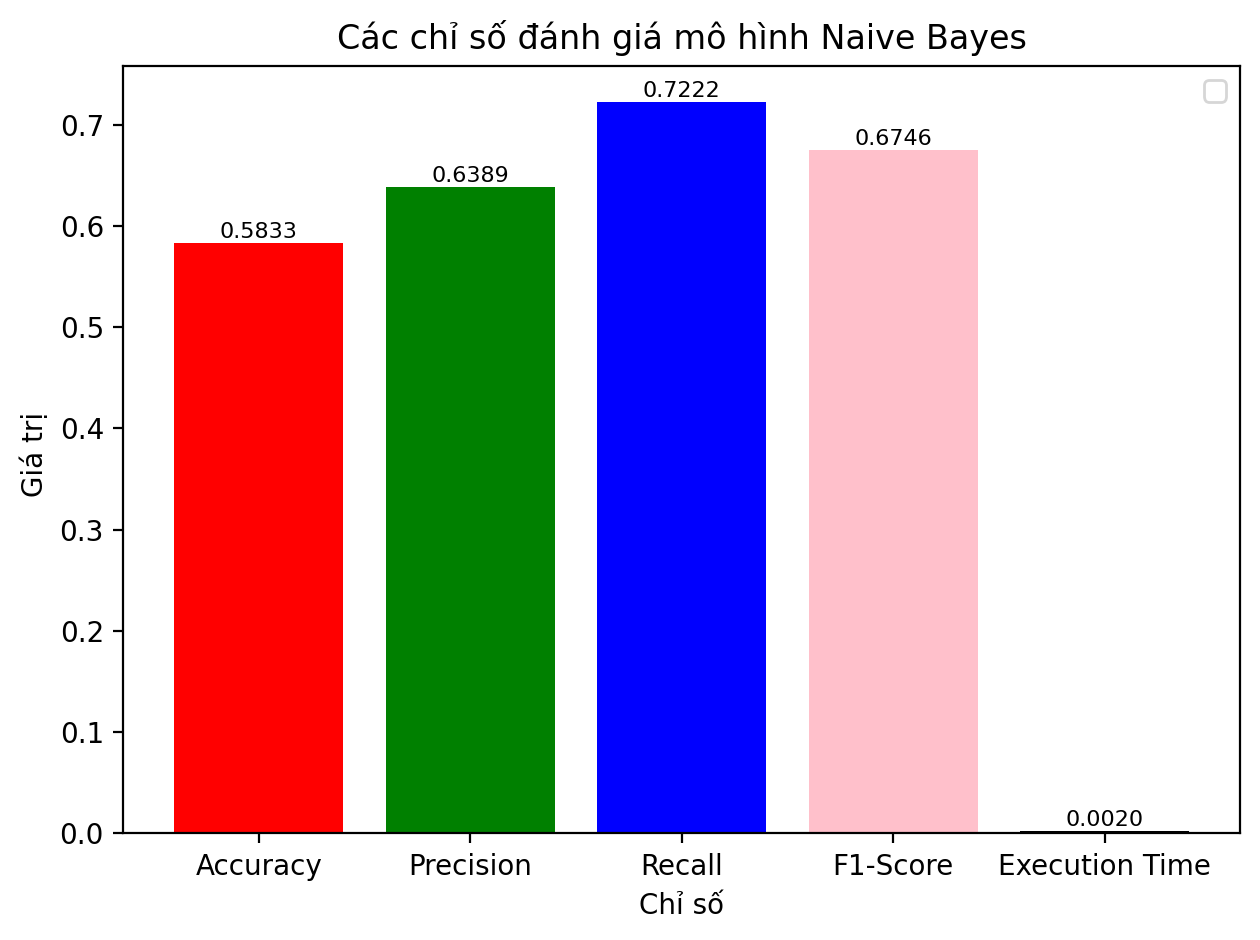

In [ ]:
# Ve bieu do the hien cac chi so
label_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Execution Time']

values = [acc_bayes, pre_bayes, rec_bayes, f1_bayes, execution_bayes]
colors = ['r', 'g', 'b', 'pink', 'black']
fig, ax = plt.subplots(dpi = 200)
rec = ax.bar(label_name, values, color = colors)
# Thêm tiêu đề cho biểu đồ
ax.set_ylabel('Giá trị ')
ax.set_xlabel('Chỉ số')
ax.set_title('Các chỉ số đánh giá mô hình Naive Bayes')
ax.set_xticks(np.arange(len(label_name)))
ax.legend()
for rect in rec:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.001, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

fig.tight_layout()
plt.show()

In [ ]:
# Cau d: Su dung mo hinh SVM
# Khoi tao dict chua cac chi so danh gia mo hinh
value_svm = {
    'accuracy' : [],
    'recall' : [],
    'precision' : [],
    'f1-score' : [],
    'execution-time' : []
}

for i in range(KFOLD):
    # Khoi tao mo hinh -svm
    clf_svm = SVC()

    start_svm = time.time() # Bat dau tinh gio
    # Huan luyen mo hinh
    clf_svm.fit(data_fold['X_train'][i], data_fold['y_train'][i])
    # Thoi gian huan luyen
    execution_time_svm = time.time() - start_svm
    # Du doan ket qua
    y_pred_svm = clf_svm.predict(data_fold['X_test'][i])

    # Tinh cac chi so danh gia mo hinh
    acc = accuracy_score(data_fold['y_test'][i], y_pred_svm)
    rec = recall_score(data_fold['y_test'][i], y_pred_svm)
    f1 = f1_score(data_fold['y_test'][i], y_pred_svm)
    pre = precision_score(data_fold['y_test'][i], y_pred_svm)

    # Luu ket qua
    value_svm['accuracy'].append(acc)
    value_svm['recall'].append(rec)
    value_svm['precision'].append(pre)
    value_svm['f1-score'].append(f1)
    value_svm['execution-time'].append(execution_time_svm)

    # In ket qua theo tung fold
    print("FOLD:", i + 1)  # In số thứ tự của fold
    print("{:<15}{:<15}{:<15}{:<15}{:<15}".format("Precision", "Recall", "F1-Score", "Accuracy", 'Execution Time'))
    # In kết quả của SVM
    print("{:<15.4}{:<15.4}{:<15.4}{:<15.4}{:<15.10}".format(
        f"{pre * 100}", f"{rec * 100}", f"{f1 * 100}", f"{acc * 100}", f"{execution_time_svm}"
    ))
    print('-'*75)

# Tinh trung binh cac chi so
acc_svm = np.mean(value_svm['accuracy'])
rec_svm = np.mean(value_svm['recall'])
pre_svm = np.mean(value_svm['precision'])
f1_svm = np.mean(value_svm['f1-score'])
execution_svm = np.mean(value_svm['execution-time'])

# Tinh do lech chuan cua cac chi so
std_acc_svm = np.std(value_svm['accuracy'])
std_rec_svm = np.std(value_svm['recall'])
std_pre_svm = np.std(value_svm['precision'])
std_f1_svm = np.std(value_svm['f1-score'])
std_execution_svm = np.std(value_svm['execution-time'])


FOLD: 1
Precision      Recall         F1-Score       Accuracy       Execution Time 
75.0           100.           85.7           75.0           0.00301742     
---------------------------------------------------------------------------
FOLD: 2
Precision      Recall         F1-Score       Accuracy       Execution Time 
75.0           100.           85.7           75.0           0.00431394     
---------------------------------------------------------------------------
FOLD: 3
Precision      Recall         F1-Score       Accuracy       Execution Time 
50.0           100.           66.6           50.0           0.00318002     
---------------------------------------------------------------------------


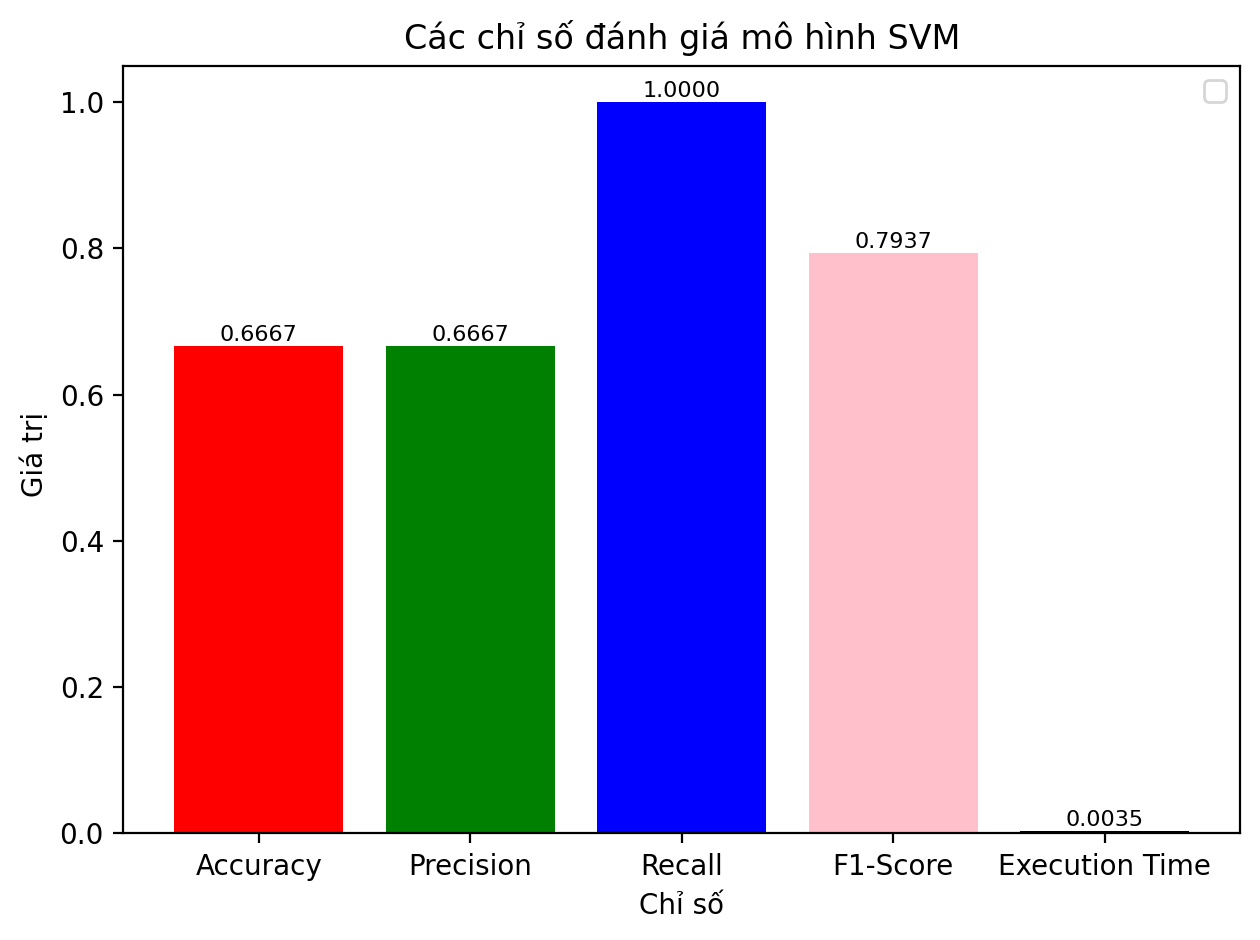

In [ ]:
# Ve bieu do the hien cac chi so
label_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Execution Time']

values = [acc_svm, pre_svm, rec_svm, f1_svm, execution_svm]
colors = ['r', 'g', 'b', 'pink', 'black']
fig, ax = plt.subplots(dpi = 200)
rec = ax.bar(label_name, values, color = colors)
# Thêm tiêu đề cho biểu đồ
ax.set_ylabel('Giá trị ')
ax.set_xlabel('Chỉ số')
ax.set_title('Các chỉ số đánh giá mô hình SVM')
ax.set_xticks(np.arange(len(label_name)))
ax.legend()
for rect in rec:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.001, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

fig.tight_layout()
plt.show()